In [68]:
#pip install pandas numpy matplotlib cartopy

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import geopandas as gpd
import numpy as np
import matplotlib.colors as mcolors
from matplotlib.cm import ScalarMappable
from scipy.stats import spearmanr
from matplotlib.patches import PathPatch
from matplotlib.path import Path
from shapely.geometry import Polygon, MultiPolygon
import matplotlib.patches as patches
import matplotlib.lines as mlines

In [151]:
#pd.set_option('display.max_columns', None)

In [152]:
data = pd.read_csv('GWS_no_soil.csv')
lat_lon = data[['lat', 'lon']]
#lat_lon

In [153]:
# Calculate the difference in groundwater storage between successive months in each year
data_diff = data.iloc[:, 2:].diff(axis=1)
# df1 = pd.concat([lat_lon, data_diff], axis=1)
# df1

In [154]:
# Get the average change in groundwater storage for each year
annual_change = []
for year in range(2002, 2020):
    start_col = ((year - 2002) * 12)-3
    end_col = start_col + 12
    if year == 2002:
        # Exclude the first month (April 2002) as it has no previous month to compare
        start_col += 1
    average_yearly_change = data_diff.iloc[:, start_col:end_col].mean(axis=1)
    annual_change.append(average_yearly_change)

# Combine lat, lon, and average annual change into a single DataFrame
output_data = pd.concat([data[['lat', 'lon']] ] + annual_change, axis=1)

# Set column names
output_data.columns = ['lat', 'lon'] + [f'{year}' for year in range(2002, 2020)]
df1 = output_data
output_data

,lat,lon,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,27.875,31.375,NaN,-0.378828,-0.150266,1.636218,-1.968394,-1.001886,0.492144,-0.606489,-0.233316,0.479535,-2.353915,0.416311,-1.003697,2.770896,-1.630461,-0.520633,-0.519847,2.173785
1,27.875,31.625,NaN,-0.412242,0.076075,1.318362,-1.810779,-1.006012,0.231149,-0.788733,-0.313950,0.617848,-3.254000,1.587401,-0.829952,0.100152,0.728652,-0.651088,-0.378223,2.056011
2,27.875,31.875,NaN,-0.412242,0.076048,1.318390,-1.810779,-1.006012,0.231149,-0.788733,-0.313977,0.617875,-3.254000,1.587374,-0.829925,0.100152,0.728625,-0.651061,-0.378223,2.056011
3,27.875,32.125,NaN,-0.412242,0.076075,1.318362,-1.810779,-1.006012,0.231149,-0.788733,-0.313977,0.617875,-3.254000,1.587374,-0.829925,0.100152,0.728625,-0.651061,-0.378223,2.056011
4,27.875,32.375,NaN,-0.412242,0.076075,1.318362,-1.810779,-1.006012,0.231149,-0.788733,-0.313950,0.617848,-3.254000,1.587374,-0.829925,0.100179,0.728598,-0.651061,-0.378196,2.055984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6197,51.125,18.875,NaN,-7.018211,2.810422,-2.018999,1.521759,1.800748,-1.115094,4.102477,6.057269,-9.099550,1.508021,0.961191,-5.589947,-1.527014,3.643142,-3.724343,-3.982637,-4.613187
6198,51.125,19.125,NaN,-7.018184,2.823138,-2.057145,1.547191,1.800721,-1.115121,4.089789,6.082727,-9.099577,1.457105,0.986677,-5.577285,-1.526960,3.643142,-3.737139,-3.957152,-4.625875
6199,51.125,19.375,NaN,-7.018130,2.823084,-2.082469,1.572514,1.800721,-1.127864,4.089762,6.057295,-9.061349,1.418876,1.024851,-5.577285,-1.526906,3.630426,-3.749936,-3.918951,-4.638645
6200,51.125,19.625,NaN,-7.018103,2.835773,-2.082361,1.572406,1.800721,-1.127945,4.089816,5.803171,-8.807171,1.380648,1.063025,-5.590028,-1.514136,3.617765,-3.750044,-3.893520,-4.651334


In [155]:
data = pd.read_csv('recharge_with_coord_lagged.csv')
data


,lat,lon,2002-03-15 00:00:00,2002-04-15 00:00:00,2002-05-15 00:00:00,2002-06-15 00:00:00,2002-07-15 00:00:00,2002-08-15 00:00:00,2002-09-15 00:00:00,2002-10-15 00:00:00,...,2019-02-15 00:00:00,2019-03-15 00:00:00,2019-04-15 00:00:00,2019-05-15 00:00:00,2019-06-15 00:00:00,2019-07-15 00:00:00,2019-08-15 00:00:00,2019-09-15 00:00:00,2019-10-15 00:00:00,2019-11-15 00:00:00
0,27.875,31.375,0.015948,0.013255,0.012127,0.010727,0.020359,0.018761,0.015336,0.013847,...,0.064172,0.067220,0.050353,0.042493,0.034633,0.030766,0.026800,0.022919,0.021134,0.018434
1,27.875,31.625,0.017548,0.014395,0.012997,0.011402,0.019492,0.017853,0.014688,0.013310,...,0.062867,0.065406,0.049298,0.041775,0.034155,0.030417,0.026550,0.022742,0.020999,0.018351
2,27.875,31.875,0.047614,0.034687,0.028728,0.024572,0.026181,0.023373,0.020211,0.018811,...,0.084177,0.086364,0.062952,0.052140,0.041880,0.036778,0.031726,0.026907,0.024648,0.021358
3,27.875,32.125,0.097509,0.066933,0.053467,0.046335,0.041988,0.037306,0.033825,0.031873,...,0.370338,0.303672,0.194007,0.148344,0.112125,0.093715,0.077436,0.063273,0.057214,0.048765
4,27.875,32.375,0.171207,0.109884,0.084524,0.074014,0.064802,0.057233,0.052990,0.050401,...,0.353380,0.291348,0.186408,0.142730,0.108017,0.090384,0.074766,0.061158,0.055498,0.047409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6197,51.125,18.875,27.583503,13.655595,7.867012,10.257937,8.765358,21.566824,16.742761,48.117516,...,51.400082,34.128949,11.587832,13.293416,8.999900,4.445931,3.944014,8.616498,12.521399,18.157111
6198,51.125,19.125,27.357369,12.878784,7.520198,10.693984,9.603347,25.065561,17.153228,46.672912,...,44.809828,30.934863,9.886375,12.212508,8.765088,4.299618,3.925346,5.582887,9.771432,15.597359
6199,51.125,19.375,27.508250,12.642055,7.430994,12.182859,10.907360,31.361860,18.697541,45.730366,...,44.924142,31.487852,10.037288,12.203614,8.908383,4.362886,3.961530,5.720589,10.104387,15.869840
6200,51.125,19.625,27.108186,11.974381,6.846845,11.835206,10.509805,33.653341,19.204182,43.614203,...,44.966187,31.299000,10.004932,12.426722,8.929076,4.352307,3.957540,5.737989,10.086259,15.904295


In [156]:
# Calculate the difference in groundwater storage between successive months in each year
data_diff = data.iloc[:, 2:].diff(axis=1)
# df2 = pd.concat([lat_lon, data_diff], axis=1)
# df2

In [157]:
# Get the average change in groundwater storage for each year
annual_change = []
for year in range(2002, 2020):
    start_col = ((year - 2002) * 12)-3
    end_col = start_col + 12
    if year == 2002:
        # Exclude the first month (April 2002) as it has no previous month to compare
        start_col += 1
        end_col  = start_col + 7
    average_yearly_change = data_diff.iloc[:, start_col:end_col].mean(axis=1)
    annual_change.append(average_yearly_change)

# Combine lat, lon, and average annual change into a single DataFrame
output_data = pd.concat([data[['lat', 'lon']] ] + annual_change, axis=1)

# Set column names
output_data.columns = ['lat', 'lon'] + [f'{year}' for year in range(2002, 2020)]
df2 = output_data
output_data

,lat,lon,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,27.875,31.375,NaN,0.000419,-0.000089,0.001638,-0.001109,0.026447,-0.024651,-0.001365,-0.001163,-0.000232,-0.000007,0.000108,0.004775,-0.002395,-0.000405,-0.001282,0.000097,-0.000236
1,27.875,31.625,NaN,0.000464,-0.000161,0.001585,-0.001006,0.026629,-0.024498,-0.001473,-0.001349,-0.000198,-0.000091,0.000281,0.005486,-0.003074,-0.000557,-0.001237,0.000066,-0.000290
2,27.875,31.875,NaN,0.000764,-0.000548,0.001798,-0.001387,0.022693,-0.016999,-0.003605,-0.002498,-0.000321,0.000182,0.000300,0.007398,-0.005405,-0.000951,-0.001147,0.000072,0.000065
3,27.875,32.125,NaN,0.001714,-0.001236,0.002266,-0.002237,0.019649,-0.008233,-0.006344,-0.005262,-0.000733,0.000906,0.000085,0.009852,-0.009387,-0.000426,-0.001385,0.000017,0.002493
4,27.875,32.375,NaN,0.002780,-0.001808,0.003111,-0.003284,0.017638,0.001422,-0.010335,-0.009144,-0.001346,0.002102,-0.000389,0.013450,-0.013843,-0.000932,-0.001499,0.000090,0.002292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6197,51.125,18.875,NaN,-2.014797,0.859143,-1.870916,1.643329,1.805800,-2.160649,1.166523,1.118871,-3.611416,2.506051,-1.472089,0.235353,-0.590774,2.096803,2.149092,-3.882609,0.132240
6198,51.125,19.125,NaN,-1.967863,1.009610,-2.023180,1.743836,1.829767,-2.247517,1.177657,1.085556,-3.627080,2.534421,-1.567459,0.157263,-0.136108,1.790731,2.078845,-3.983042,0.091444
6199,51.125,19.375,NaN,-1.867927,1.121313,-2.192563,1.912046,1.783509,-2.358046,1.211597,1.057634,-3.661061,2.643780,-1.679556,0.056340,-0.000543,1.818784,2.044339,-4.003350,0.113720
6200,51.125,19.625,NaN,-1.746565,1.095169,-2.254189,1.963840,1.696175,-2.401340,1.253765,1.139797,-3.762866,2.583895,-1.673179,0.069650,0.079543,1.858190,1.949742,-3.966838,0.114024


In [158]:
# Initialize a new data frame to store the correlation coefficients
correlation_df = pd.DataFrame(columns=['latitude', 'longitude', 'correlation', 'p_value'])

In [159]:
# Loop through each row and compute the correlation
for index, row in df1.iterrows():
    lat = row['lat']
    lon = row['lon']
    
    # Extract time series from both data frames
    ts1 = row[3:]
    ts2 = df2.iloc[index, 3:]
    
    # Compute the Spearman rank correlation coefficient and p-value
    corr, p_value = spearmanr(ts1, ts2)
    
    # Append the result to the correlation data frame
    correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)

# View the correlation_df
print(correlation_df)

C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignor

C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignor

C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignor

C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignor

C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignor

C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignor

C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignor

C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignor

C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignor

C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignor

C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignor

C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignor

C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignor

C:\Users\emman\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df =

C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An inp

C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignor

C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignor

C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignor

C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignor

C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignor

C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignor

C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignor

C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignor

C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignor

C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignor

C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An inp

C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignor

C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignor

C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignor

C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignor

C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignor

C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignor

C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignor

C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignor

C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignor

C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append met

C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignor

C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignor

C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignor

C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignor

C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignor

C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignor

C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignor

C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignor

C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignor

C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignor

C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignor

C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignor

C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignor

C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignor

      latitude  longitude  correlation   p_value
0       27.875     31.375    -0.200980  0.439234
1       27.875     31.625    -0.112745  0.666592
2       27.875     31.875    -0.085784  0.743395
3       27.875     32.125    -0.014706  0.955327
4       27.875     32.375    -0.012255  0.962768
...        ...        ...          ...       ...
6197    51.125     18.875     0.588235  0.013001
6198    51.125     19.125     0.571078  0.016646
6199    51.125     19.375     0.561275  0.019063
6200    51.125     19.625     0.595588  0.011647
6201    51.125     19.875     0.566176  0.017823

[6202 rows x 4 columns]


C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignore_index=True)
C:\Users\emman\AppData\Local\Temp\ipykernel_15792\142034065.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_df = correlation_df.append({'latitude': lat, 'longitude': lon, 'correlation': corr, 'p_value': p_value}, ignor

In [160]:
correlation_df

,latitude,longitude,correlation,p_value
0,27.875,31.375,-0.200980,0.439234
1,27.875,31.625,-0.112745,0.666592
2,27.875,31.875,-0.085784,0.743395
3,27.875,32.125,-0.014706,0.955327
4,27.875,32.375,-0.012255,0.962768
...,...,...,...,...
6197,51.125,18.875,0.588235,0.013001
6198,51.125,19.125,0.571078,0.016646
6199,51.125,19.375,0.561275,0.019063
6200,51.125,19.625,0.595588,0.011647


In [161]:
W = (correlation_df['correlation'] <= -0.6).sum()
X = ((correlation_df['correlation'] > -0.6) & (correlation_df['correlation'] < 0)).sum()
Y = ((correlation_df['correlation'] >= 0) & (correlation_df['correlation'] < 0.6)).sum()
Z = (correlation_df['correlation'] >= 0.6).sum()

print(W, X, Y, Z)

6 802 4096 987


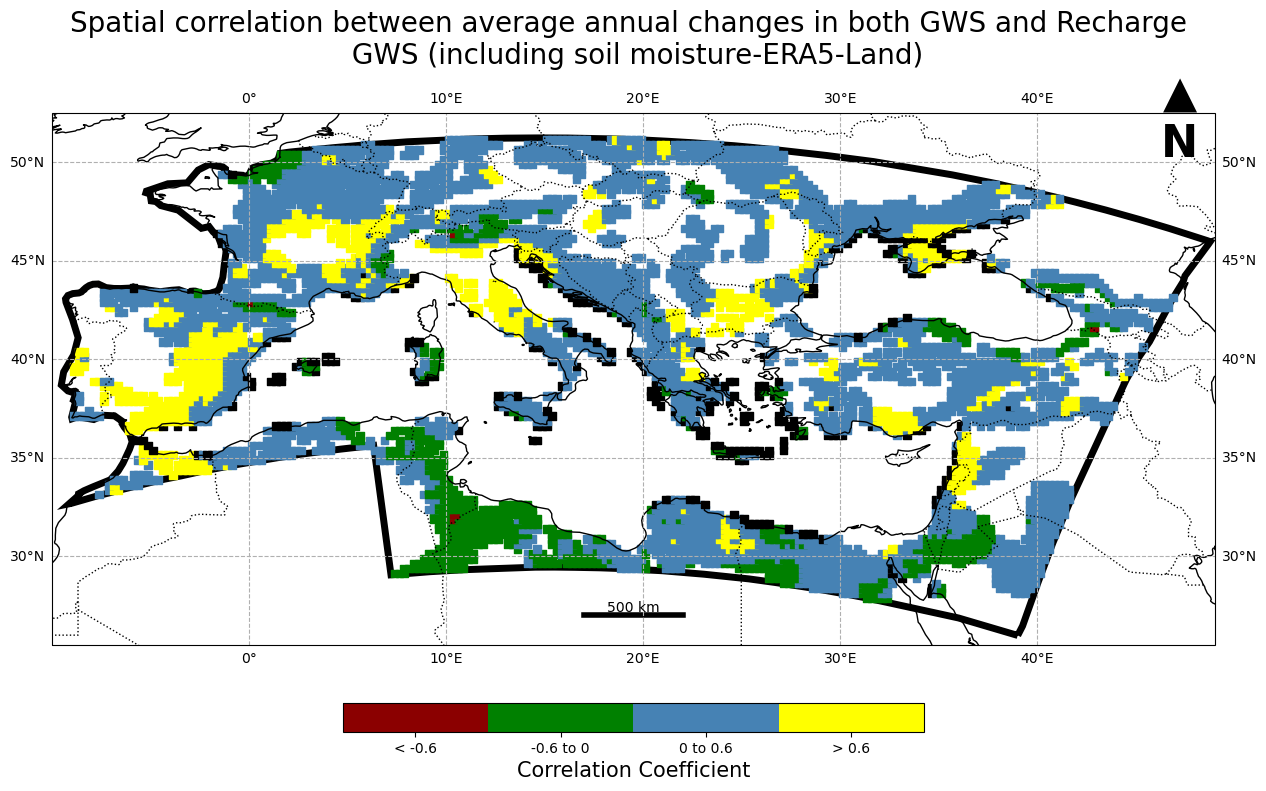

In [149]:
# Function to add a scalebar
def add_scalebar(ax, length, location=(0.5, 0.05), linewidth=4):
    llx0, llx1, lly0, lly1 = ax.get_extent(ccrs.PlateCarree())
    sbllx = (llx1 + llx0) / 2
    sblly = lly0 + (lly1 - lly0) * location[1]
    tmc = ccrs.TransverseMercator(sbllx, sblly)
    x0, x1, y0, y1 = ax.get_extent(tmc)
    sbx = x0 + (x1 - x0) * location[0]
    sby = y0 + (y1 - y0) * location[1]
    bar_xs = [sbx - length * 500, sbx + length * 500]
    ax.plot(bar_xs, [sby, sby], transform=tmc, color='k', linewidth=linewidth)
    ax.text(sbx, sby, str(length) + ' km', transform=tmc,
            horizontalalignment='center', verticalalignment='bottom')

cmap = mcolors.ListedColormap(['darkred', 'green', 'steelblue', 'yellow'])
bounds = [-1, -0.6, 0, 0.6, 1]
norm = mcolors.BoundaryNorm(bounds, cmap.N)

correlation_df['color'] = np.select(
    [correlation_df['correlation'] <= -0.6,
     (correlation_df['correlation'] > -0.6) & (correlation_df['correlation'] < 0),
     (correlation_df['correlation'] >= 0) & (correlation_df['correlation'] < 0.6),
     correlation_df['correlation'] >= 0.6],
    ['darkred', 'green', 'steelblue', 'yellow'])

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

gdf = gpd.read_file('study_extent.shp')

for geometry in gdf['geometry']:
    if isinstance(geometry, Polygon):
        x, y = geometry.exterior.coords.xy
        ax.add_patch(PathPatch(Path(list(zip(x, y))), fill=None, edgecolor='k', linewidth=5))
    elif isinstance(geometry, MultiPolygon):
        for subgeometry in geometry:
            x, y = subgeometry.exterior.coords.xy
            ax.add_patch(PathPatch(Path(list(zip(x, y))), fill=None, edgecolor='k', linewidth=5))

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.gridlines(draw_labels=True, linestyle='--')

sc = ax.scatter(correlation_df['longitude'], correlation_df['latitude'], c=correlation_df['color'],
                marker='s', s=30, edgecolor=correlation_df['color'], transform=ccrs.PlateCarree())

# Create a ScalarMappable object for the colorbar
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # You need to set an empty array for the ScalarMappable object

cbar = plt.colorbar(sm, orientation='horizontal', shrink=0.5, ticks=[-0.8, -0.3, 0.3, 0.8], pad=0.05)
cbar.set_label('Correlation Coefficient', fontsize=15)
cbar.set_ticklabels(['< -0.6', '-0.6 to 0', '0 to 0.6', '> 0.6'])

ax.set_extent([-10, 49, 25.5, 49])

add_scalebar(ax, 500)

arrow_x, arrow_y = 0.97, .9
ax.text(arrow_x, arrow_y, u'\u25B2\nN', transform=ax.transAxes, ha='center', va='bottom', fontsize=32, fontweight='bold')

plt.title('Spatial correlation between average annual changes in both GWS and Recharge \n GWS (including soil moisture-ERA5-Land)', fontsize=20, pad =20)
plt.show()